In [5]:
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt

from src.dataset import *
from src.lp import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
def plot_consumption(size=24*7):
    plt.plot(lp.P[:size], label="real")
    plt.plot(np.sum(result.P[:, :size], axis=0), label="LP")
    plt.plot([sum(lp.p_max)] * size, label="p_max")
    plt.plot(result.buffered[:size], label="buffer")
    plt.legend()

def plot_load(size=24*7):
    for n in range(result.load.shape[0]):
        data = result.load[n, :size]
        plt.plot(range(size), data, label="PEM" if n < PEM_amount else "AWE")
    plt.legend()

In [7]:
dataset = Dataset.load("../data/Timeseries_33.153_-100.213_E5_200000kWp_crystSi_14_33deg_-3deg_2013_2023.csv")

In [ ]:
PEM_amount = 1
AWE_amount = 8
lp = LP(dataset.data_power[:180*24], PEM_amount, AWE_amount, 3000)
lp.solve()

In [ ]:
result = lp.get_result()
print(result)
plot_consumption(24*12)

obj: 4320.0, buffer_capacity: 15181999.999999402, P_delta: None


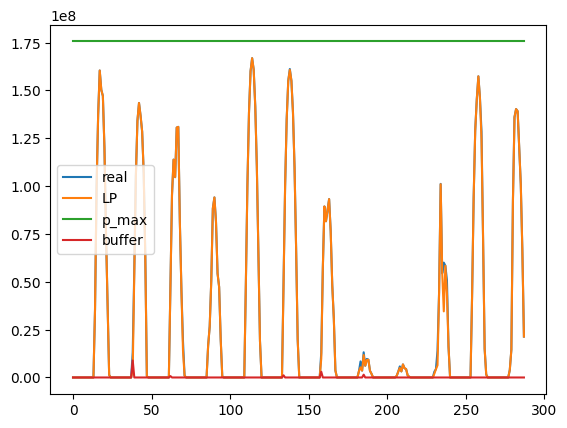

In [26]:
result = lp.get_result()
print(result)
plot_consumption(24*12)

In [ ]:
plot_load(25)